# determine_region

#### A notebook to determine what region (e.g. neighborhood, ward, census district) the issue is referring to

In [117]:
import fiona
from shapely.geometry import shape
import nhrc2
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from collections import defaultdict
import numpy as np
from matplotlib.patches import Polygon
from shapely.geometry import Point

%matplotlib inline

In [80]:
#the project root directory:
nhrc2dir = ('/').join(nhrc2.__file__.split('/')[:-1])+'/'

### Read in neighborhood shapefiles:

In [ ]:
c = fiona.open(nhrc2dir+'data/nh_neighborhoods/nh_neighborhoods.shp')
pol = c.next()
geom = shape(pol['geometry'])

In [50]:
c.crs

{'init': u'epsg:4326'}

In [33]:
for i in c.items():
    print(i[1])

{'geometry': {'type': 'Polygon', 'coordinates': [[(-72.91843899999999, 41.313173), (-72.921372, 41.314352), (-72.920858, 41.315444), (-72.919754, 41.317823), (-72.919323, 41.31873999999999), (-72.918906, 41.319638), (-72.918478, 41.320482), (-72.918431, 41.320571), (-72.917988, 41.321487), (-72.917782, 41.321893), (-72.91723299999998, 41.323046), (-72.916879, 41.323826), (-72.916488, 41.32467799999999), (-72.916348, 41.324973), (-72.915789, 41.326158), (-72.914894, 41.328111), (-72.91424399999998, 41.329431), (-72.914136, 41.329671), (-72.913966, 41.330012), (-72.913704, 41.330631), (-72.913621, 41.330819), (-72.91328999999999, 41.331576), (-72.913257, 41.331644), (-72.913086, 41.331999), (-72.912925, 41.332327), (-72.912529, 41.333192), (-72.911301, 41.332493), (-72.909651, 41.331517), (-72.909242, 41.33128), (-72.908947, 41.331103), (-72.908451, 41.330805), (-72.902536, 41.327202), (-72.89882199999998, 41.327902), (-72.897752, 41.32809799999999), (-72.8965, 41.328295), (-72.894741, 4

In [41]:
len(c)

20

In [42]:
for i in c:
    pol = i
    geom = shape(pol['geometry'])
    geom

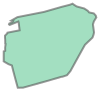

In [43]:
geom

### Now plot the shapefiles

In [118]:
#Based on code from Kelly Jordhal: 
#http://nbviewer.ipython.org/github/mqlaql/geospatial-data/blob/master/Geospatial-Data-with-Python.ipynb

def plot_polygon(ax, poly):
    a = np.asarray(poly.exterior)
    ax.add_patch(Polygon(a, facecolor='#46959E', alpha=0.3))
    ax.plot(a[:, 0], a[:, 1], color='black')

def plot_multipolygon(ax, geom):
    """ Can safely call with either Polygon or Multipolygon geometry
    """
    if geom.type == 'Polygon':
        plot_polygon(ax, geom)
    elif geom.type == 'MultiPolygon':
        for poly in geom.geoms:
            plot_polygon(ax, poly)

In [119]:
nhv_geom = defaultdict()
#colors = ['red', 'green', 'orange', 'brown', 'purple']

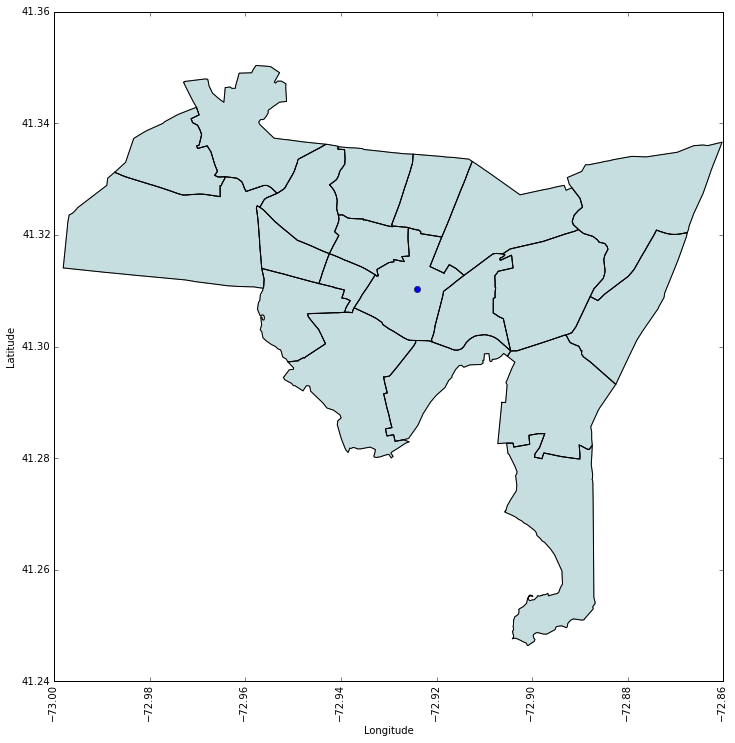

In [121]:
fig, ax = plt.subplots(figsize=(12,12))
for rec in c:
    #print(rec['geometry']['type'])
    hood = rec['properties']['name']
    nhv_geom[hood] = shape(rec['geometry'])
    plot_multipolygon(ax, nhv_geom[hood])

labels = ax.get_xticklabels() 
for label in labels: 
    label.set_rotation(90) 
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.plot(scf_df.loc[0, 'lng'], scf_df.loc[0, 'lat'], 'o')

###Read in issues and determine the region

In this section I will read determine the region each issue occurs in. First to read in the issues:

In [82]:
import nhrc2.backend.read_seeclickfix_api_to_csv as rscf

In [83]:
scf_cats = rscf.read_categories(readfile=True)

In [85]:
scf_df = rscf.read_issues(scf_cats, readfile=True)

SNOW RELATED 8516
Bins for Trash & Recycling 5743
Graffiti 122
Hangers 6215
Health Complaints 5185
Illegal Dumping 1250
Other 374
Other - city responsibility 3018
Parking Meter 372
Parking Violation/Abandoned Auto 121
Parks Request 126
Policing Issue 2626
Potholes 116
Public Space, Streets and Drains 1249
Private Property Issue 1251
Sidewalks and Curb damage 117
Signs / Bus Shelters / Pavement Markings 373
Street Lamp 124
Traffic/Road Safety 2625
Traffic Signal / Pedestrian Signal 51
Trash & Recycling 1966
Tree Trimming 1853
Request for volunteers 5998
General Bus Request/Incident 4947
Post to Neighbors other


In [173]:
len(scf_cats)

25

In [88]:
scf_df.head(3)

,acknowledged_at,address,category,closed_at,created_at,id,issue_id,lat,lng,reporter_id,reporter_name,reporter_role,shortened_url,status,summary,updated_at,int_issue_id
0,2015-03-30T16:03:33-04:00,"25 Elmer Street New Haven, Connecticut",SNOW RELATED,None,2015-03-29T17:18:53-04:00,1559551,8516,41.310373,-72.924160,0,CAROL SANTACROCE,Registered User,http://bit.ly/1HVR8D7,Acknowledged,SNOW RELATED,2015-03-30T16:03:33-04:00,8516
1,None,"Lenox Street And Clifton Street New Haven, Co...",SNOW RELATED,None,2015-03-17T12:04:30-04:00,1536264,8516,41.309046,-72.884204,6774,Department of Public Works,Verified Official,http://bit.ly/19w8mbW,Open,Unshoveled Sidewalks,2015-03-17T12:04:30-04:00,8516
2,None,"591 Whitney Avenue New Haven, Connecticut",SNOW RELATED,None,2015-03-16T17:17:58-04:00,1534432,8516,41.326617,-72.915233,0,An anonymous SeeClickFix user,Registered User,http://bit.ly/1GeXnOd,Open,SNOW RELATED,2015-03-16T17:17:58-04:00,8516


In [89]:
len(scf_df)

9080

Remove issues that do not have correct coordinates:

In [97]:
scf_df = scf_df[((scf_df['lat'] < 41.36) & (scf_df['lat'] > 41.24) & (scf_df['lng']>=-73.00) & (scf_df['lng'] <= -72.86))]
print(len(scf_df))

8076


In [98]:
scf_df.loc[0, 'lat']

41.310372589942702

In [122]:
grid_point = Point(scf_df.loc[0, 'lng'], scf_df.loc[0, 'lat']) 

In [159]:
for idx in range(5):
    grid_point = Point(scf_df.loc[idx, 'lng'], scf_df.loc[idx, 'lat']) 
    print('Point {} at {}'.format(idx, scf_df.loc[idx, 'address']))
    print('Downtown: {}'.format(grid_point.within(nhv_geom['Downtown'])))
    print('East Rock: {}'.format(grid_point.within(nhv_geom['East Rock'])))
    print('Fair Haven Heights: {}'.format(grid_point.within(nhv_geom['Fair Haven Heights'])))

Point 0 at 25 Elmer Street New Haven, Connecticut
Downtown: True
East Rock: False
Fair Haven Heights: False
Point 1 at Lenox Street And Clifton Street  New Haven, Connecticut
Downtown: False
East Rock: False
Fair Haven Heights: True
Point 2 at 591 Whitney Avenue New Haven, Connecticut
Downtown: False
East Rock: True
Fair Haven Heights: False
Point 3 at 900 Block Of State St New Haven, Connecticut
Downtown: False
East Rock: True
Fair Haven Heights: False
Point 4 at 112-116 Court Street New Haven, Connecticut
Downtown: True
East Rock: False
Fair Haven Heights: False


In [172]:
print('Number of neighborhoods: {}'.format(len(nhv_geom.keys())))
for hood in nhv_geom.keys():
    print(hood)

Number of neighborhoods: 20
Edgewood
Fair Haven Heights
Amity
Prospect Hill
West Rock
Beaver Hills
Quinnipiac
Wooster Square/Mill River
East Rock
Newhallville
Long Wharf
Downtown
West River
Westville
Dixwell
Annex
Fair Haven
Dwight
East Shore
Hill


In [168]:
def get_neighborhoods(scf_df, neighborhoods):
    hoods = []
    for idx in scf_df.index:
        grid_point = Point(scf_df.loc[idx, 'lng'], scf_df.loc[idx, 'lat']) 
        for hoodnum, hood in enumerate(nhv_geom.keys()):
            if grid_point.within(nhv_geom[hood]):
                hoods.append(hood)
                break
            if hoodnum == 19:
                #There are 20 neighborhoods. If you are the 20th (element 19 in 
                #zero-based indexing) and have not continued out of the iteration
                #set the neighborhood name to "Other":
                hoods.append('Other')
    return hoods
            

In [169]:
%time nbrhoods = get_neighborhoods(scf_df, nhv_geom)

CPU times: user 5 s, sys: 12.5 ms, total: 5.02 s
Wall time: 5.02 s


In [170]:
print(len(scf_df))
print(len(nbrhoods))

8076
8076
